# 1. What is Sentiment Analysis?

🧠 Definition:

Sentiment Analysis is a Natural Language Processing (NLP) technique used to identify and extract emotional tones or opinions from text. It helps determine whether a given piece of text conveys a positive, negative, or neutral sentiment.

🤔 Why Do We Need It?

In today’s digital age, businesses receive massive volumes of text-based data through:

- Customer reviews

- Social media posts

- Support tickets

- Chatbot interactions

- Survey responses

# Sentiment Analysis helps us:

- Understand customer satisfaction and pain points

- Measure public opinion on products or campaigns

- Prioritize urgent or emotionally charged support tickets

- Monitor brand reputation in real time

- 🔍 Real-World Analogy:

  Imagine you run a coffee shop and a customer says:

  "I love the cappuccino but the place is too noisy."

  As a human, you can understand both the positive (cappuccino) and negative (noise) parts of the comment. Sentiment Analysis tries to automate this understanding at scale.

2. 🎯 Industry Use Cases

🛒 E-commerce Platforms (e.g., Amazon, Flipkart):

Analyze customer reviews to:

Highlight trending products

Identify recurring issues (e.g., late delivery, broken packaging)

Trigger alerts for negative feedback

📱 Social Media Monitoring (e.g., Hootsuite, Sprinklr):

Track brand mentions across Twitter, Instagram

Understand how users feel about a new product launch

Detect PR crises early

🏥 Healthcare Sector:

Monitor patient feedback in hospitals or apps like Practo

Understand sentiment in mental health chatbots

🏦 Banking and Finance:

Analyze feedback from net banking or app reviews

Detect customer dissatisfaction for fraud-prone areas

🎬 Entertainment Platforms (e.g., Netflix, YouTube):

Understand viewer sentiment on new releases

Improve recommendation systems using sentiment cues


In [2]:
!python -m textblob.download_corpora

/opt/anaconda3/envs/tensorflow/bin/python: Error while finding module specification for 'textblob.download_corpora' (ModuleNotFoundError: No module named 'textblob')


In [3]:
!pip install gensim


  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 16.2 MB/s eta 0:00:0000:0100:01
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 18.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [4]:
!pip install -q nrclex

In [5]:
!pip install numpy==1.26.4

In [6]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


#Restart the Session to setup the lib properly


In [1]:
import warnings
from nrclex import NRCLex
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#Importing necessary libraries
import gensim
import gensim.corpora as corpora
nltk.download('stopwords')
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from textblob import TextBlob
import spacy
# Step 1: Define your input text
text = "The service was outstanding and the food was delicious!"

# Step 2: Create a TextBlob object
blob = TextBlob(text)

# Step 3: Extract sentiment
sentiment = blob.sentiment

# Step 4: Print the results
print("Polarity:", sentiment.polarity)
print("Subjectivity:", sentiment.subjectivity)

Polarity: 0.75
Subjectivity: 0.9375


3. 🧪 Deep Dive: Polarity and Subjectivity
   When using tools like TextBlob for sentiment analysis, two key metrics are returned:

🔢 Polarity

Measures how positive or negative the text is.

Value ranges from:

-1.0 (most negative)

to +1.0 (most positive)

🎭 Subjectivity

Measures how subjective or objective the text is.

Value ranges from:

0.0 (completely objective or factual)

to 1.0 (completely subjective or opinionated)


In [3]:
"""
✅ Interpretation:

Polarity = 0.1: Slightly positive overall (because "masterpiece" is strong, but "too long" and "boring" bring it down).

Subjectivity = 0.75: Highly opinionated (not based on factual evidence).
"""
from textblob import TextBlob

text = "The movie was a masterpiece, but too long and slightly boring in parts."
blob = TextBlob(text)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)


Polarity: -0.525
Subjectivity: 0.7


In [4]:
"""
✅ Interpretation:

Polarity = 0.0: No emotional tone; purely factual.

Subjectivity = 0.0: Entirely objective; not an opinion.
"""
text2 = "The sun is 93 million miles away from Earth."
blob2 = TextBlob(text2)
print("Polarity:", blob2.sentiment.polarity)
print("Subjectivity:", blob2.sentiment.subjectivity)


Polarity: 0.0
Subjectivity: 0.0


# Lets try on real dataset


In [6]:
#Importing necessary libraries
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
#Reading training, test and sample data files
training= pd.read_csv('./data/train.csv')

training.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4


| **Column Name**        | **Explanation**                                                                                                 |
| ---------------------- | --------------------------------------------------------------------------------------------------------------- |
| `ID`                   | A unique identifier for each review. Just a row number or index.                                                |
| `Place`                | The company or startup being reviewed (e.g., `startup_1`).                                                      |
| `location`             | The physical office location of the employee (e.g., `Mountain View, CA`). Sometimes it's `NaN` if not provided. |
| `date`                 | The date the review was written (e.g., `Dec 11, 2018`).                                                         |
| `status`               | Whether the person is a **current** or **former** employee.                                                     |
| `job_title`            | The title or position of the reviewer (e.g., `Software Engineer III`, `Program Manager`).                       |
| `summary`              | A short headline or summary of their experience at the company.                                                 |
| `positives`            | What the employee liked about working at the company.                                                           |
| `negatives`            | Complaints or issues they faced at the company.                                                                 |
| `advice_to_mgmt`       | Optional advice the employee wants to give to the management team.                                              |
| `score_1` to `score_6` | These are **individual rating dimensions** like:                                                                |


In [7]:

print("Information of training dataset:\n", training.info())
#Creating set of negative and positive reviews from the training dataset
neg = training['negatives']
pos= training ['positives']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30336 non-null  int64  
 1   Place           30336 non-null  object 
 2   location        19082 non-null  object 
 3   date            30336 non-null  object 
 4   status          30336 non-null  object 
 5   job_title       30336 non-null  object 
 6   summary         30281 non-null  object 
 7   positives       30336 non-null  object 
 8   negatives       30336 non-null  object 
 9   advice_to_mgmt  16893 non-null  object 
 10  score_1         27150 non-null  float64
 11  score_2         24286 non-null  float64
 12  score_3         27167 non-null  float64
 13  score_4         27145 non-null  float64
 14  score_5         26851 non-null  float64
 15  score_6         30336 non-null  int64  
 16  overall         30336 non-null  int64  
dtypes: float64(5), int64(3), object

In [8]:
blob2 = TextBlob(pos.iloc[0])
print("Polarity:", blob2.sentiment.polarity)
print("Subjectivity:", blob2.sentiment.subjectivity)

Polarity: 0.29464285714285715
Subjectivity: 0.5714285714285714


In [9]:
blob2 = TextBlob(neg.iloc[0])
print("Polarity:", blob2.sentiment.polarity)
print("Subjectivity:", blob2.sentiment.subjectivity)

Polarity: -0.15555555555555559
Subjectivity: 0.2888888888888889


In [10]:
#Performing sentiment analysis on the negative reviews
slice_neg=neg [4:8,]
#Executing the for loop for displaying multiple reviews
for review in slice_neg:
  print('Review is:', review)
  print('Predicted Polarity:',TextBlob(review).sentiment.polarity)
  print('.'*50)

Review is: Size matters. Engineers are a bit disconnected with customers.
Predicted Polarity: 0.0
..................................................
Review is: There is lower compensation than expected
Predicted Polarity: -0.1
..................................................
Review is: Wide variety in experience based on team.
Predicted Polarity: -0.1
..................................................
Review is: Long hours, far locations, a lot of work
Predicted Polarity: 0.025
..................................................


In [ ]:
#Performing sentiment analysis on the poistive reviews
slice_pos=pos [14:18,]
for review in slice_pos:
  print('Review is:', review)
  print('Predicted Polarity:',TextBlob(review).sentiment.polarity)
  print('.'*50)

Review is: Google is one of the beast Company in the world
Predicted Polarity: 0.0
..................................................
Review is: Better than average engineers. Competitive compensation.
Predicted Polarity: 0.175
..................................................
Review is: The best company I've worked for. Culture, perks, the way people are treated. Very thankful for this experience.
Predicted Polarity: 0.6
..................................................
Review is: Easy place and people are nice
Predicted Polarity: 0.5166666666666666
..................................................


# 🧠 Sentiment Analysis with the “NRC” Lexicon


# 📚 What is the NRC Lexicon?

The NRC Emotion Lexicon (also known as EmoLex) is a word-emotion association lexicon developed by the National Research Council of Canada.

Unlike other sentiment lexicons that only classify words as positive or negative, the NRC Lexicon maps English words to eight basic emotions and two sentiments:

🎭 Emotions:

- Anger
- Anticipation
- Disgust
- Fear
- Joy
- Sadness
- Surprise
- Trust

😃 Sentiments:

- Positive
- Negative

Each word can be associated with one or more emotions and sentiments.


# Why NRC is Powerful?

Multi-label tagging: A word can express multiple emotions.

Emotion analysis: Beyond just “good/bad,” you can analyze how someone feels — joy, anger, trust, etc.

Industry-grade insights: Helps in deep understanding of customer emotions.


In [ ]:
!pip install -q nrclex

In [11]:
#!pip install nrclex
from nrclex import NRCLex


# Define your input text
text = "I love the new phone design, but I'm scared about its durability."

# Create an NRCLex object
emotion = NRCLex(text)

#NRCLex(text): This breaks your input text into words and checks each one against the NRC lexicon.


# Display raw emotion scores
print("Raw Emotion Scores:", emotion.raw_emotion_scores)
#.raw_emotion_scores: Returns a dictionary with the count of words associated with each emotion.

# Display top emotions in the sentence
print("Top Emotions:", emotion.top_emotions)
#.top_emotions: Gives the most frequent emotions found in the text


Raw Emotion Scores: {'joy': 1, 'positive': 2, 'trust': 1}
Top Emotions: [('positive', 0.5)]


1️⃣ How Many Words Are There in the NRC Emotion Lexicon?
There are about 14,000 unique English words in the NRC Lexicon, each associated with one or more of the following 10 affect categories:


In [12]:
#Each word in the lexicon has a binary (0/1) value for each of the above categories.


In [13]:
emotion = NRCLex("I love this design but I fear it won't last long.")
#Stopwords and punctuations are usually kept, but only words present in the NRC Lexicon are analyzed.

#The library then looks up each word in its internal lexicon database and records the associated emotions.

How raw_emotion_scores is Calculated
This is a simple count of how many times each emotion appears based on the words found in the NRC lexicon.

Example:
Sentence: "I love this design but I fear it won't last long."

Tokenized: ['i', 'love', 'this', 'design', 'but', 'i', 'fear', 'it', 'won’t', 'last', 'long']

Let’s say:

“love” → joy, trust, positive

“fear” → fear, negative


In [14]:
emotion.raw_emotion_scores

{'joy': 1,
 'positive': 1,
 'anger': 1,
 'fear': 1,
 'negative': 1,
 'anticipation': 1}

In [15]:
emotion.top_emotions


[('fear', 0.16666666666666666),
 ('anger', 0.16666666666666666),
 ('positive', 0.16666666666666666),
 ('negative', 0.16666666666666666),
 ('joy', 0.16666666666666666),
 ('anticipation', 0.16666666666666666)]

Each value here (e.g., 0.16666666666666666) is the proportion of that emotion compared to the total number of emotional tags found in your sentence.

Think of it as:

Out of all the emotional "tags" found in your sentence, what percentage of them were fear, anger, joy, etc.?


Let’s say the library found a total of 6 emotional tags from the words in your sentence:

1 word contributed to fear

1 to anger

1 to positive

1 to negative

1 to joy

1 to anticipation

👉 So total emotion tags = 6

Now, for each emotion:

makefile
Copy
Edit
frequency = count / total
= 1 / 6
= 0.166666...
That’s why every emotion in your output shows 0.166666....


In [16]:
emotion.affect_frequencies


{'fear': 0.16666666666666666,
 'anger': 0.16666666666666666,
 'anticip': 0.0,
 'trust': 0.0,
 'surprise': 0.0,
 'positive': 0.16666666666666666,
 'negative': 0.16666666666666666,
 'sadness': 0.0,
 'disgust': 0.0,
 'joy': 0.16666666666666666,
 'anticipation': 0.16666666666666666}

In [17]:

text = "Although I am worried, I still trust the process and feel excited."

emotion = NRCLex(text)

print("Words in Lexicon:", emotion.words)
print("Raw Emotion Scores:", emotion.raw_emotion_scores)
print("Top Emotions:", emotion.top_emotions)
print("Emotion Frequencies:", emotion.affect_frequencies)


Words in Lexicon: ['Although', 'I', 'am', 'worried', 'I', 'still', 'trust', 'the', 'process', 'and', 'feel', 'excited']
Raw Emotion Scores: {'negative': 1, 'sadness': 1, 'trust': 2, 'anticipation': 1, 'joy': 1, 'positive': 1, 'surprise': 1}
Top Emotions: [('trust', 0.25)]
Emotion Frequencies: {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.25, 'surprise': 0.125, 'positive': 0.125, 'negative': 0.125, 'sadness': 0.125, 'disgust': 0.0, 'joy': 0.125, 'anticipation': 0.125}


🔁 Pivot Table of Words vs Emotions:
Emotion        anticipation  fear  joy  negative  positive  trust
Word                                                             
anticipation.           1.0   0.0  0.0       0.0       0.0    0.0
anxious                 1.0   1.0  0.0       1.0       0.0    0.0
full                    0.0   0.0  0.0       0.0       1.0    0.0
happy,                  1.0   0.0  1.0       0.0       1.0    1.0


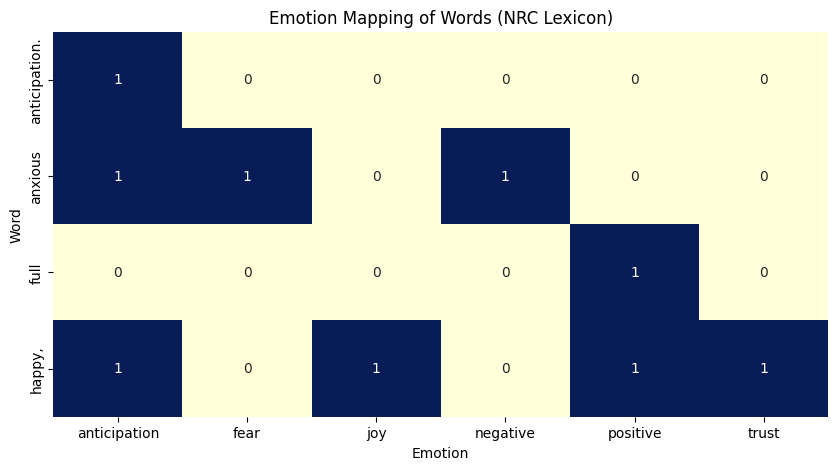

In [18]:


# 📝 Define a sample sentence
text = "The movie made me happy, anxious and full of anticipation."

# 🧪 Step 1: Analyze text
emotion = NRCLex(text)

# 📤 Step 2: Get the raw emotion mapping
raw_dict = emotion.raw_emotion_scores

# 🧱 Step 3: Split the text into words
words = text.lower().split()

# 📦 Step 4: Create a DataFrame of words and their emotions
emotion_data = []

for word in words:
    word_emotion = NRCLex(word)
    for emo in word_emotion.raw_emotion_scores.keys():
        emotion_data.append({'Word': word, 'Emotion': emo, 'Flag': 1})

# Convert to DataFrame
df = pd.DataFrame(emotion_data)

# 🧊 Step 5: Create Pivot Table
pivot_table = pd.pivot_table(df, values='Flag', index='Word', columns='Emotion', fill_value=0)

# 🖨️ Display the Pivot Table
print("🔁 Pivot Table of Words vs Emotions:")
print(pivot_table)


plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Emotion Mapping of Words (NRC Lexicon)')
plt.show()


# Sentiment Analysis with “AFINN” Lexicon


📚 What is AFINN?
AFINN is a lexicon-based sentiment analysis tool created by Finn Årup Nielsen. It contains English words rated for valence (emotional weight) on a scale from -5 to +5:

Negative values (e.g., -4) = Strong negative sentiment (e.g., "terrible")

Positive values (e.g., +4) = Strong positive sentiment (e.g., "fantastic")

Zero or no match = Neutral or not found in the lexicon


Why Use AFINN?
AFINN is useful when:

You want a fast and simple polarity score.

Your input is mostly short and informal text (e.g., tweets, reviews).

You don’t need deep emotion detection (unlike NRC).


In [ ]:
!pip install -q afinn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# ✅ Import Afinn
from afinn import Afinn

# 🎯 Initialize Afinn
af = Afinn()

# 📝 Define input sentences
sentences = [
    "The service was amazing and the staff was wonderful!",
    "The food was horrible and I hated the experience.",
    "The hotel is okay, nothing special.",
    "Absolutely love this place!",
    "The customer support is terrible!"
]

# 🧪 Analyze each sentence
for sentence in sentences:
    score = af.score(sentence)
    print(f"'{sentence}' --> Sentiment Score: {score}")


'The service was amazing and the staff was wonderful!' --> Sentiment Score: 8.0
'The food was horrible and I hated the experience.' --> Sentiment Score: -6.0
'The hotel is okay, nothing special.' --> Sentiment Score: 0.0
'Absolutely love this place!' --> Sentiment Score: 3.0
'The customer support is terrible!' --> Sentiment Score: -1.0


What Does Afinn Do?
The AFINN lexicon contains words with scores between -5 and +5:

✅ Positive words like "amazing" = +4

❌ Negative words like "pathetic" = -2

🎯 Neutral words or unknown words = score is not counted


Let's Try a Few Sentences
We will:

Split the sentence into words

Check which words are found in the AFINN lexicon

Get the score of each word

Add all the scores to get a total sentiment score


In [ ]:
afinn = Afinn()


In [ ]:
for review in sentences:
    words = review.lower().split()  # split into words
    matched_words = [word for word in words if afinn.score(word) != 0]  # keep only known words
    word_scores = {word: afinn.score(word) for word in matched_words}  # get score for each

    total_score = afinn.score(review)  # total sentiment score

    print(f"\n📄 Review: {review}")
    print(f"🧩 Matched Words in AFINN: {matched_words}")
    print(f"📊 Word Scores: {word_scores}")
    print(f"✅ Total Review Score: {total_score}")



📄 Review: The service was amazing and the staff was wonderful!
🧩 Matched Words in AFINN: ['amazing', 'wonderful!']
📊 Word Scores: {'amazing': 4.0, 'wonderful!': 4.0}
✅ Total Review Score: 8.0

📄 Review: The food was horrible and I hated the experience.
🧩 Matched Words in AFINN: ['horrible', 'hated']
📊 Word Scores: {'horrible': -3.0, 'hated': -3.0}
✅ Total Review Score: -6.0

📄 Review: The hotel is okay, nothing special.
🧩 Matched Words in AFINN: []
📊 Word Scores: {}
✅ Total Review Score: 0.0

📄 Review: Absolutely love this place!
🧩 Matched Words in AFINN: ['love']
📊 Word Scores: {'love': 3.0}
✅ Total Review Score: 3.0

📄 Review: The customer support is terrible!
🧩 Matched Words in AFINN: ['support', 'terrible!']
📊 Word Scores: {'support': 2.0, 'terrible!': -3.0}
✅ Total Review Score: -1.0


In [ ]:
#Importing afinn lexicon and functions
from afinn import Afinn
#Creating an afinn object
afinn = Afinn()
#Performing sentiment analysis using afinn lexicon
reviewl="Beautiful and amazing place!"
print("Words in the review:",afinn.split(reviewl))
print("Emotions in the review:",afinn.find_all(reviewl))
print("Score of each emotion:", afinn.scores_with_pattern(reviewl))
print("Total score of emotions:",afinn.score_with_wordlist(reviewl))
review2='Great, superb,excellent, wonderful, beautiful and amazing place!'
print("Words in the review:",afinn.split(review2))
print("Emotions in the review:",afinn.find_all(review2))
print("Score of each emotion:",afinn.scores_with_pattern(review2))
print("Total score of emotions:",afinn.score_with_wordlist(review2))
review3='Pathetic, disgusting and worse food'
print("Words in the review:",afinn.split(review3))
print("Emotions in the review:",afinn.find_all(review3))
print("Score of each emotion:", afinn.scores_with_pattern(review3))
print("Total score of emotions:",afinn.score_with_wordlist(review3))

Words in the review: ['Beautiful', 'and', 'amazing', 'place']
Emotions in the review: ['beautiful', 'amazing']
Score of each emotion: [3, 4]
Total score of emotions: 7.0
Words in the review: ['Great', 'superb', 'excellent', 'wonderful', 'beautiful', 'and', 'amazing', 'place']
Emotions in the review: ['great', 'superb', 'excellent', 'wonderful', 'beautiful', 'amazing']
Score of each emotion: [3, 5, 3, 4, 3, 4]
Total score of emotions: 22.0
Words in the review: ['Pathetic', 'disgusting', 'and', 'worse', 'food']
Emotions in the review: ['pathetic', 'disgusting', 'worse']
Score of each emotion: [-2, -3, -3]
Total score of emotions: -8.0


In [ ]:
from afinn import Afinn
#Displaying scores of negative reviews
neg_reviews_slice = neg[727:731,]
afinn= Afinn()
for review in neg_reviews_slice:
  print ("Review is:", review)
  print ("Words in the review:",afinn.split(review))
  print("Emotions in the review:", afinn.find_all(review))
  print ("Score of each emotion:",afinn.scores_with_pattern(review))
  print("Total score of emotions:",afinn.score_with_wordlist (review))
  print ('-'*50)

Review is: Difficult to move teams in google.
Words in the review: ['Difficult', 'to', 'move', 'teams', 'in', 'google']
Emotions in the review: ['difficult']
Score of each emotion: [-1]
Total score of emotions: -1.0
--------------------------------------------------
Review is: dumb people, bad politics, worst management
Words in the review: ['dumb', 'people', 'bad', 'politics', 'worst', 'management']
Emotions in the review: ['dumb', 'bad', 'worst']
Score of each emotion: [-3, -3, -3]
Total score of emotions: -9.0
--------------------------------------------------
Review is: Nothing that I think would be standard across many people's experiences. I wasn't a fan of MTV and found the entire Bay Area dreadful. Being one of the few interns in my building and the only intern on my team, I had some trouble finding other interns to bond with.
Words in the review: ['Nothing', 'that', 'I', 'think', 'would', 'be', 'standard', 'across', 'many', 'people', 's', 'experiences', 'I', 'wasn', 't', 'a', 

# Content-Based Recommendation System


A Content-Based Recommender System suggests items to a user by analyzing the features of the items and user preferences. It assumes that if a user liked an item, they will also like similar items in terms of content.

🚀 How It Works:

- Each item (movie, product, job post, etc.) is described by a set of attributes or features.

- User preferences are modeled using items they have interacted with.

- The system recommends items similar (based on features) to what the user liked.


# Lets Understand this with an example


| Feature                 | Content-Based Filtering                            | Collaborative Filtering                                   |
| ----------------------- | -------------------------------------------------- | --------------------------------------------------------- |
| **Basis**               | Item features and user preferences                 | User-item interactions (ratings, likes)                   |
| **Needs user history?** | Yes, but only their own                            | Yes, across many users                                    |
| **Cold-start problem**  | Solves it for new users if profile exists          | Struggles for new users or new items                      |
| **Scalability**         | Scales better for new users                        | May require full user-item matrix                         |
| **Example (Industry)**  | Netflix recommends movies similar to what you like | Amazon recommends what others with similar behavior liked |


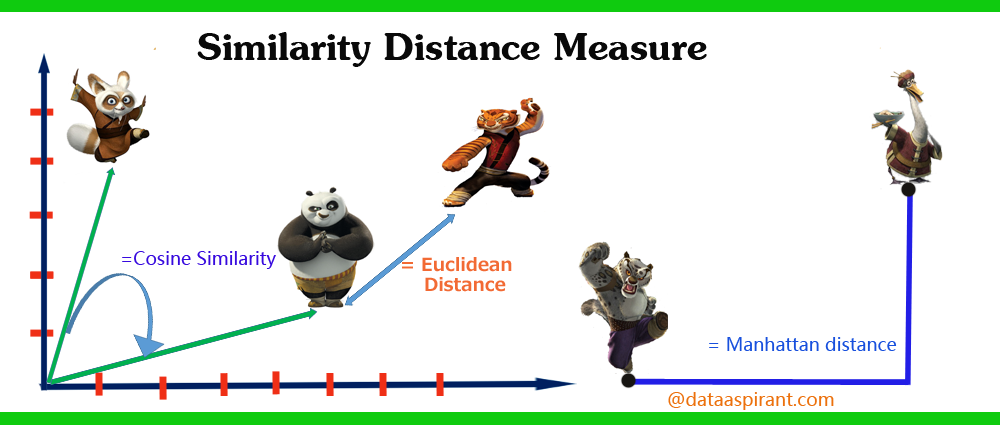


# Content based - Cosine Similarity


✅ 1. Cosine Similarity
Measures the cosine of the angle between two vectors (how similar their directions are).

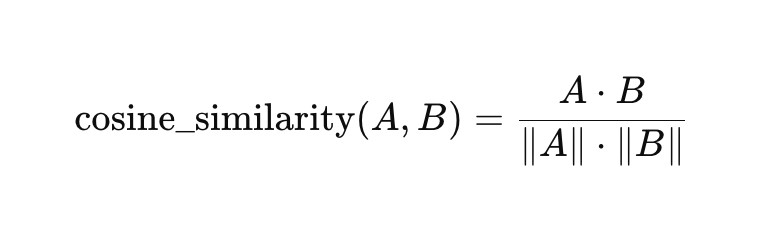


In [ ]:
#Each product is represented as a 10-dimensional vector based on features like:
Product_A =  [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
Product_B = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
Product_C = [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]


# +1 = same direction (perfectly similar)

# 0 = orthogonal (no similarity)

# –1 = opposite direction (not relevant in binary/non-negative contexts)



| Feature Index | Feature Name (Example)     |
| ------------- | -------------------------- |
| 0             | Wireless                   |
| 1             | Bluetooth                  |
| 2             | Noise Cancelling           |
| 3             | Over-ear                   |
| 4             | Portable                   |
| 5             | Voice Assistant Compatible |
| 6             | Foldable                   |
| 7             | Water Resistant            |
| 8             | Fast Charging              |
| 9             | Long Battery Life          |


# Dot Product


| Index | A   | B   | A \* B |
| ----- | --- | --- | ------ |
| 0     | 1   | 0   | 0      |
| 1     | 0   | 1   | 0      |
| 2     | 1   | 1   | 1      |
| 3     | 0   | 0   | 0      |
| 4     | 1   | 1   | 1      |
| 5     | 0   | 1   | 0      |
| 6     | 0   | 0   | 0      |
| 7     | 1   | 0   | 0      |
| 8     | 0   | 1   | 0      |
| 9     | 1   | 0   | 0      |


# Norms (Magnitudes)


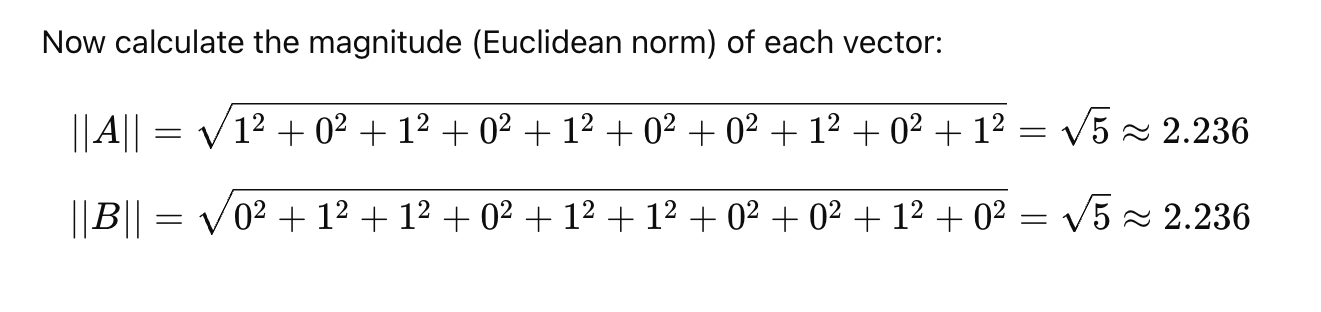


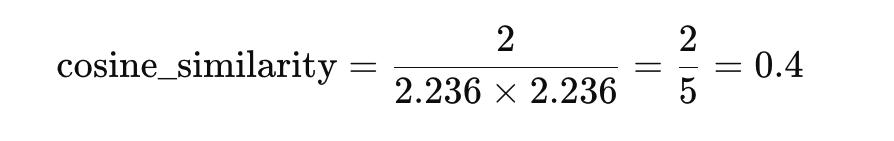


|               | Product A | Product B | Product C |
| ------------- | --------- | --------- | --------- |
| **Product A** | 1.000     | 0.400     | 0.365     |
| **Product B** | 0.400     | 1.000     | 0.365     |
| **Product C** | 0.365     | 0.365     | 1.000     |


Interpretation:

Product A and B share some similarity (0.4), mainly due to common features.

A and C are less similar


# Euclidean Distance


Measures the straight-line distance between two points.


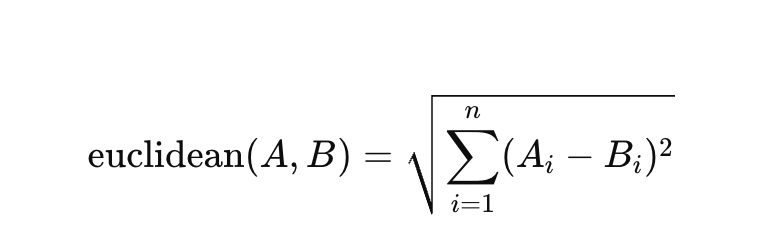


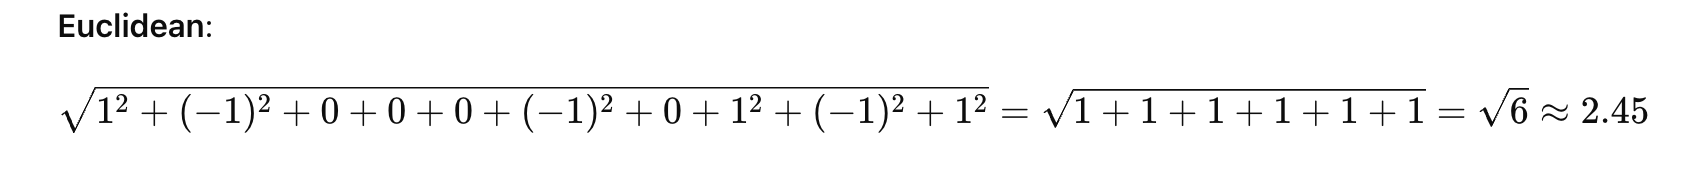


# Manhattan Distance (L1 Norm)

Measures the sum of absolute differences (like moving in a grid).


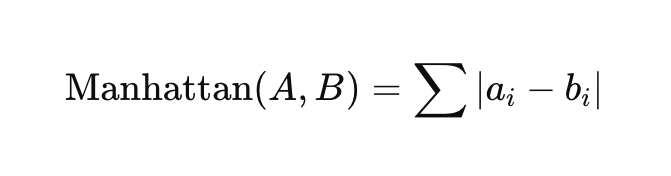


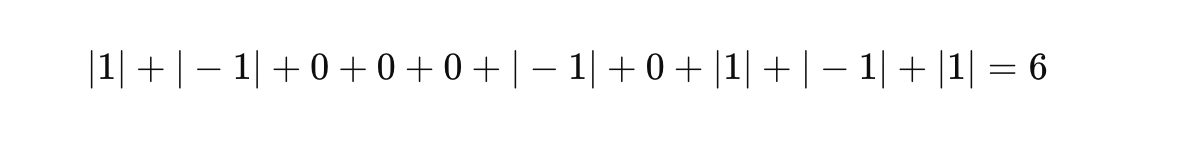


# Lets work on real world data


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer


In [ ]:
import pandas as pd
df = pd.read_csv("restaurant.csv")
df.head()

,Restaurant,City,Cuisine
0,Kochi Kitchen,Kerala,"North Indian, Mughlai, Chinese"
1,Hotel Chandra,Hyderabad,"Cafe, Mexican, Italian"
2,Cafe Coffee Day Surat,Surat,"North Indian, Rajasthani"
3,Hotel KRC Palace,Tezpur,North Indian
4,Galaxy Surat,Surat,"North Indian, South Indian, Andhra, Chinese"


In [ ]:
df['City'] = df['City'].apply(str.lower)
df.head()

,Restaurant,City,Cuisine
0,Kochi Kitchen,kerala,"North Indian, Mughlai, Chinese"
1,Hotel Chandra,hyderabad,"Cafe, Mexican, Italian"
2,Cafe Coffee Day Surat,surat,"North Indian, Rajasthani"
3,Hotel KRC Palace,tezpur,North Indian
4,Galaxy Surat,surat,"North Indian, South Indian, Andhra, Chinese"


In [ ]:
df.columns = ['restaurant','city','cuisine']

In [ ]:
df.shape

(250, 3)

In [ ]:
lat_lon = pd.read_csv("India Cities LatLng.csv")
lat_lon.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,Mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,Kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,Bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,Chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0


In [ ]:
lat_lon['city'] = lat_lon['city'].apply(str.lower)
lat_lon.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0


In [ ]:
lat_lon['city'].unique()

array(['delhi', 'mumbai', 'kolkāta', 'bangalore', 'chennai', 'hyderābād',
       'pune', 'ahmadābād', 'sūrat', 'lucknow', 'jaipur', 'cawnpore',
       'mirzāpur', 'nāgpur', 'ghāziābād', 'indore', 'vadodara',
       'visakhapatnam', 'bhopāl', 'chinchvad', 'patna', 'ludhiāna',
       'āgra', 'kalyān', 'madurai', 'jamshedpur', 'nashik', 'farīdābād',
       'aurangābād', 'rājkot', 'meerut', 'jabalpur', 'thāne', 'dhanbād',
       'allahābād', 'vārānasi', 'srīnagar', 'amritsar', 'alīgarh',
       'bhiwandi', 'gwalior', 'bhilai', 'hāora', 'rānchi', 'bezwāda',
       'chandīgarh', 'mysore', 'raipur', 'kota', 'bareilly', 'jodhpur',
       'coimbatore', 'dispur', 'guwāhāti', 'solāpur', 'trichinopoly',
       'hubli', 'jalandhar', 'bhubaneshwar', 'bhayandar', 'morādābād',
       'kolhāpur', 'thiruvananthapuram', 'sahāranpur', 'warangal',
       'salem', 'mālegaon', 'kochi', 'gorakhpur', 'shimoga', 'tiruppūr',
       'guntūr', 'raurkela', 'mangalore', 'nānded', 'cuttack', 'chānda',
       'dehra d

In [ ]:
lat_lon = lat_lon[['city',	'lat','lng']]

In [ ]:
import unicodedata
#normalzing kagaznāgār - to. - kagaznagar
def norm(word):
  return unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8')


In [ ]:
lat_lon['city'] = lat_lon['city'].apply(norm)

In [ ]:
df = pd.merge(df,lat_lon,on='city',how='left')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,restaurant,city,cuisine,lat,lng
1,Hotel Chandra,hyderabad,"Cafe, Mexican, Italian",17.3667,78.4667
2,Cafe Coffee Day Surat,surat,"North Indian, Rajasthani",21.1700,72.8300
4,Galaxy Surat,surat,"North Indian, South Indian, Andhra, Chinese",21.1700,72.8300
5,The Coral Tree,agra,"Pizza, Cafe, Italian",27.1800,78.0200
6,Radisson Blu Hotel,indore,"Cafe, Italian, Continental",22.7206,75.8472


In [ ]:
# Step 1: Split cuisines into lists
df['cuisine_list'] = df['cuisine'].apply(lambda x: [c.strip() for c in x.split(',')])



mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(mlb.fit_transform(df['cuisine_list']), columns=mlb.classes_, index=df.index)

"""
df['cuisine_list'] contains a list of cuisines for each restaurant (e.g., ['North Indian', 'Chinese']).

MultiLabelBinarizer() is used to convert multi-label categorical data into a binary matrix (i.e., one-hot encoded format).

fit_transform() learns all unique cuisines and transforms the list into columns of 1s and 0s.

Each column represents a cuisine. A value of 1 means that restaurant serves that cuisine, 0 means it doesn’t.

The result is stored in cuisine_encoded, a new DataFrame with the same index as the original df.
"""

# Step 3: Concatenate the original DataFrame with the encoded features
df_final = pd.concat([df.drop(columns=['cuisine_list']), cuisine_encoded], axis=1)






In [ ]:
df_final

,restaurant,city,cuisine,lat,lng,Almond Soup,American,Andhra,Arabian,Asian,...,Tacos,Tex-Mex,Thai,Thali,Tiramisu,Vada,Vanilla Ice Cream,Vegetarian,Vietnamese,Waffles
1,Hotel Chandra,hyderabad,"Cafe, Mexican, Italian",17.3667,78.4667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cafe Coffee Day Surat,surat,"North Indian, Rajasthani",21.1700,72.8300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Galaxy Surat,surat,"North Indian, South Indian, Andhra, Chinese",21.1700,72.8300,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,The Coral Tree,agra,"Pizza, Cafe, Italian",27.1800,78.0200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Radisson Blu Hotel,indore,"Cafe, Italian, Continental",22.7206,75.8472,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Haldirams,nagpur,"Indian, Asian",21.1539,79.0831,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
244,Ashoka Restaurant,nagpur,"Indian, Asian, International",21.1539,79.0831,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
246,MKT,new delhi,"Italian, Mexican, Indian",28.7000,77.2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,Thyme,new delhi,"Indian, International",28.7000,77.2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final.drop(["cuisine","city"],axis=1,inplace=True)

In [ ]:
df_final.set_index("restaurant",inplace=True)

In [ ]:
df_final.head()

,lat,lng,Almond Soup,American,Andhra,Arabian,Asian,BBQ,Babycorn Manchurian,Bakery,...,Tacos,Tex-Mex,Thai,Thali,Tiramisu,Vada,Vanilla Ice Cream,Vegetarian,Vietnamese,Waffles
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,17.3667,78.4667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafe Coffee Day Surat,21.1700,72.8300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Galaxy Surat,21.1700,72.8300,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Coral Tree,27.1800,78.0200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Radisson Blu Hotel,22.7206,75.8472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity



# Step 2: Compute cosine similarity
cosine_sim_matrix = cosine_similarity(df_final)

# Step 3: Convert similarity matrix to DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df_final.index, columns=df_final.index)
"""
cosine_similarity(df_final) computes the cosine similarity between each pair of restaurants.

The result is a square matrix of shape (n_restaurants × n_restaurants).

Each value cosine_sim_matrix[i][j] tells how similar restaurant i is to restaurant j based on their features (like cuisine).
"""

cosine_sim_df.head()

restaurant,Hotel Chandra,Cafe Coffee Day Surat,Galaxy Surat,The Coral Tree,Radisson Blu Hotel,Domino's Surat,Hotel Sheela,Hotel Sita Niwas,Hotel Celebration,Chandan Tea,...,Paasha,Ukiyo,Dakshin,Karavalli,Lotus Pavilion,Haldirams,Ashoka Restaurant,MKT,Thyme,Food Exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,1.000000,0.997479,0.997306,0.992968,0.997164,0.997479,0.992973,0.983365,0.997095,0.997095,...,0.999293,0.999293,0.998325,0.998245,0.998245,0.998671,0.998596,0.990331,0.990102,0.990174
Cafe Coffee Day Surat,0.997479,1.000000,0.999653,0.998238,0.999554,0.999826,0.998091,0.992790,0.999593,0.999593,...,0.999049,0.999049,0.992879,0.992799,0.992799,0.999446,0.999371,0.996940,0.997013,0.997086
Galaxy Surat,0.997306,0.999653,1.000000,0.998064,0.999380,0.999826,0.997918,0.992618,0.999420,0.999568,...,0.998875,0.998875,0.992706,0.992626,0.992626,0.999272,0.999198,0.996766,0.996840,0.996913
The Coral Tree,0.992968,0.998238,0.998064,1.000000,0.998872,0.998238,0.999707,0.997925,0.999073,0.998937,...,0.995690,0.995690,0.985354,0.985275,0.985275,0.996906,0.996832,0.999492,0.999419,0.999492
Radisson Blu Hotel,0.997164,0.999554,0.999380,0.998872,1.000000,0.999554,0.998726,0.993954,0.999855,0.999855,...,0.998646,0.998646,0.991825,0.991745,0.991745,0.999171,0.999097,0.997590,0.997510,0.997584


✅ Why You See ~0.99 for All:
Cosine similarity compares the angle between vectors. If your feature vectors contain:

Large, continuous values (like lat ≈ 17–27, lng ≈ 72–78)

Many small binary values (like 0s and 1s from one-hot encoded cuisines)

Then the lat/lng values dominate the vector direction, making every vector look similar, because:

Lat/lng values have much larger magnitudes.

Binary features have low weight in cosine calculation.

Thus, the direction of vectors becomes similar → cosine similarity ≈ 1.0 for most pairs.


In [ ]:
# Step 4: Define function to recommend top 3 similar restaurants
def recommend_restaurants(input_restaurant, sim_df, top_n=3):

    """
    Verifies whether the provided restaurant name is valid and present in the similarity matrix.

    If not found, returns a user-friendly error message.

    Fetches all similarity scores for the input_restaurant from the similarity DataFrame.

    Sorts them in descending order, so the most similar restaurants come first.

    The restaurant will always have a similarity of 1.0 with itself, so it appears first.
    """



    if input_restaurant not in sim_df.columns:
        return f"Restaurant '{input_restaurant}' not found in the data."

    # Get similarity scores for the input restaurant, sort descending
    sim_scores = sim_df[input_restaurant].sort_values(ascending=False)

    # Skip the first one (it's the same restaurant), take next top_n
    top_similar = sim_scores[1:top_n+1]#Skips the first row (index 0) since it's the restaurant compared with itself.
    return top_similar

# Step 5: Try with a user input
input_restaurant = "Galaxy Surat"
recommendations = recommend_restaurants(input_restaurant, cosine_sim_df)

print(f"Top 3 similar restaurants to '{input_restaurant}':\n")
print(recommendations)

Top 3 similar restaurants to 'Galaxy Surat':

restaurant
Hotel Amar Vilas                 0.999966
Ashok Hotel                      0.999886
Express Inn Family Restaurant    0.999864
Name: Galaxy Surat, dtype: float64


In [ ]:
#looking at top 3 recommendation

In [ ]:
df[df["restaurant"].isin(["Hotel Amar Vilas","Ashok Hotel","Express Inn Family Restaurant"])]

,restaurant,city,cuisine,lat,lng,cuisine_list
41,Ashok Hotel,indore,"Biryani, North Indian, Chinese, Andhra, South ...",22.7206,75.8472,"[Biryani, North Indian, Chinese, Andhra, South..."
153,Express Inn Family Restaurant,patna,"North Indian, South Indian, Andhra",25.6100,85.1414,"[North Indian, South Indian, Andhra]"
208,Hotel Amar Vilas,indore,"North Indian, South Indian, Andhra, Chinese",22.7206,75.8472,"[North Indian, South Indian, Andhra, Chinese]"


In [ ]:
df_final.head()

,lat,lng,Almond Soup,American,Andhra,Arabian,Asian,BBQ,Babycorn Manchurian,Bakery,...,Tacos,Tex-Mex,Thai,Thali,Tiramisu,Vada,Vanilla Ice Cream,Vegetarian,Vietnamese,Waffles
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,17.3667,78.4667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafe Coffee Day Surat,21.1700,72.8300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Galaxy Surat,21.1700,72.8300,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Coral Tree,27.1800,78.0200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Radisson Blu Hotel,22.7206,75.8472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import pairwise_distances

# Euclidean distance matrix
euclidean_dist = pairwise_distances(df_final, metric='euclidean')


euclidean_df = pd.DataFrame(euclidean_dist, index=df_final.index, columns=df_final.index)
euclidean_df.head()

restaurant,Hotel Chandra,Cafe Coffee Day Surat,Galaxy Surat,The Coral Tree,Radisson Blu Hotel,Domino's Surat,Hotel Sheela,Hotel Sita Niwas,Hotel Celebration,Chandan Tea,...,Paasha,Ukiyo,Dakshin,Karavalli,Lotus Pavilion,Haldirams,Ashoka Restaurant,MKT,Thyme,Food Exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,0.000000,7.158036,7.296402,9.924737,6.125849,7.158036,9.924737,14.769665,10.700636,10.700636,...,5.156955,5.156955,4.907799,5.008642,5.008642,4.441040,4.552234,11.491224,11.621025,11.577919
Cafe Coffee Day Surat,7.158036,0.000000,2.000000,8.249618,4.062986,1.414214,8.369958,10.872623,13.277205,13.277205,...,3.328042,3.328042,9.642379,9.694094,9.694094,6.565175,6.640897,8.988760,8.932961,8.876812
Galaxy Surat,7.296402,2.000000,0.000000,8.369958,4.302076,1.414214,8.488592,10.964212,13.352310,13.277205,...,3.616056,3.616056,9.745536,9.796707,9.796707,6.715766,6.789810,9.099330,9.044214,8.988760
The Coral Tree,9.924737,8.249618,8.369958,0.000001,5.158227,8.249618,2.000000,5.452816,7.292410,7.428273,...,9.815664,9.815664,14.356358,14.391144,14.391144,6.514911,6.591211,2.642499,2.825385,2.642499
Radisson Blu Hotel,6.125849,4.062986,4.302076,5.158227,0.000000,4.062986,5.348580,9.062836,9.835181,9.835181,...,5.061232,5.061232,10.106505,10.155858,10.155858,4.233863,4.350356,6.448511,6.525587,6.448511


In [ ]:
def recommend_restaurants_euclidean(restaurant_name, distance_matrix, top_n=3):
    if restaurant_name not in distance_matrix.index:
        return f"Restaurant '{restaurant_name}' not found in data."

    distances = distance_matrix.loc[restaurant_name].sort_values()

    # Exclude the restaurant itself (distance = 0)
    recommendations = distances[1:top_n+1]
    return recommendations


In [ ]:
recommendations = recommend_restaurants_euclidean("Galaxy Surat", euclidean_df, top_n=3)
print("Top 3 similar restaurants using Euclidean Distance:\n", recommendations)


Top 3 similar restaurants using Euclidean Distance:
 restaurant
Domino's Surat        1.414214
Golden Plaza Surat    1.414214
Wok On Fire Surat     1.732051
Name: Galaxy Surat, dtype: float64


In [ ]:
df[df["restaurant"].isin(["Domino's Surat","Golden Plaza Surat","Wok On Fire Surat","Galaxy Surat"])]

,restaurant,city,cuisine,lat,lng,cuisine_list
4,Galaxy Surat,surat,"North Indian, South Indian, Andhra, Chinese",21.17,72.83,"[North Indian, South Indian, Andhra, Chinese]"
7,Domino's Surat,surat,"South Indian, North Indian",21.17,72.83,"[South Indian, North Indian]"
39,Wok On Fire Surat,surat,North Indian,21.17,72.83,[North Indian]
121,Golden Plaza Surat,surat,"Chinese, North Indian",21.17,72.83,"[Chinese, North Indian]"


Now you can see the distance based algo works on magnitude.As lat and log has high range they are dominating and you are getting only restaurant of surat


# Normalizing all the features


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_final)

# Create a new DataFrame with the same column names and index
df_final_scaled = pd.DataFrame(scaled_features, index=df_final.index, columns=df_final.columns)
df_final_scaled.head()

,lat,lng,Almond Soup,American,Andhra,Arabian,Asian,BBQ,Babycorn Manchurian,Bakery,...,Tacos,Tex-Mex,Thai,Thali,Tiramisu,Vada,Vanilla Ice Cream,Vegetarian,Vietnamese,Waffles
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,0.261968,0.457844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cafe Coffee Day Surat,0.458947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy Surat,0.458947,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Coral Tree,0.770216,0.421561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Radisson Blu Hotel,0.539256,0.245074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity



# Step 2: Compute cosine similarity
cosine_sim_matrix = cosine_similarity(df_final_scaled)

# Step 3: Convert similarity matrix to DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df_final.index, columns=df_final.index)


cosine_sim_df.head()

restaurant,Hotel Chandra,Cafe Coffee Day Surat,Galaxy Surat,The Coral Tree,Radisson Blu Hotel,Domino's Surat,Hotel Sheela,Hotel Sita Niwas,Hotel Celebration,Chandan Tea,...,Paasha,Ukiyo,Dakshin,Karavalli,Lotus Pavilion,Haldirams,Ashoka Restaurant,MKT,Thyme,Food Exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,1.000000,0.044661,0.032361,0.681114,0.679913,0.044661,0.780490,0.643232,0.688857,0.688857,...,0.064153,0.064153,0.095895,0.070150,0.070150,0.123950,0.104563,0.671595,0.125999,0.156437
Cafe Coffee Day Surat,0.044661,1.000000,0.396808,0.122431,0.090933,0.547641,0.098968,0.153822,0.100528,0.100528,...,0.094229,0.094229,0.009854,0.007208,0.007208,0.090016,0.075936,0.133610,0.155314,0.192834
Galaxy Surat,0.032361,0.396808,1.000000,0.088711,0.065888,0.724577,0.071710,0.111456,0.072840,0.303223,...,0.068276,0.068276,0.007140,0.005223,0.005223,0.065223,0.055022,0.096810,0.112537,0.139723
The Coral Tree,0.681114,0.122431,0.088711,1.000000,0.708542,0.122431,0.593990,0.985258,0.962129,0.718686,...,0.138235,0.138235,0.091021,0.066585,0.066585,0.185853,0.156783,0.473530,0.245240,0.304484
Radisson Blu Hotel,0.679913,0.090933,0.065888,0.708542,1.000000,0.090933,0.572753,0.702207,0.675737,0.675737,...,0.100509,0.100509,0.057730,0.042231,0.042231,0.129194,0.108986,0.430275,0.176391,0.219003


In [ ]:
# Step 5: Try with a user input
input_restaurant = "Galaxy Surat"
recommendations = recommend_restaurants(input_restaurant, cosine_sim_df)

print(f"Top 3 similar restaurants to '{input_restaurant}':\n")
print(recommendations)

Top 3 similar restaurants to 'Galaxy Surat':

restaurant
Hotel Amar Vilas    0.992365
Novotel             0.970766
Ashok Hotel         0.894843
Name: Galaxy Surat, dtype: float64


In [ ]:
df[df["restaurant"].isin(["Hotel Amar Vilas","Ashok Hotel","Novotel"])]

,restaurant,city,cuisine,lat,lng,cuisine_list
41,Ashok Hotel,indore,"Biryani, North Indian, Chinese, Andhra, South ...",22.7206,75.8472,"[Biryani, North Indian, Chinese, Andhra, South..."
94,Novotel,hyderabad,"Andhra, Chinese, South Indian, North Indian",17.3667,78.4667,"[Andhra, Chinese, South Indian, North Indian]"
208,Hotel Amar Vilas,indore,"North Indian, South Indian, Andhra, Chinese",22.7206,75.8472,"[North Indian, South Indian, Andhra, Chinese]"


# Euclidean Distance


In [ ]:
from sklearn.metrics import pairwise_distances

# Euclidean distance matrix
euclidean_dist = pairwise_distances(df_final_scaled, metric='euclidean')


euclidean_df = pd.DataFrame(euclidean_dist, index=df_final_scaled.index, columns=df_final_scaled.index)
euclidean_df.head()

restaurant,Hotel Chandra,Cafe Coffee Day Surat,Galaxy Surat,The Coral Tree,Radisson Blu Hotel,Domino's Surat,Hotel Sheela,Hotel Sita Niwas,Hotel Celebration,Chandan Tea,...,Paasha,Ukiyo,Dakshin,Karavalli,Lotus Pavilion,Haldirams,Ashoka Restaurant,MKT,Thyme,Food Exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,0.000000,2.290943,2.692289,1.503207,1.456763,2.290943,1.503207,1.622033,1.573597,1.573597,...,2.035648,2.035648,2.014158,2.248741,2.248741,2.245213,2.457840,1.534640,2.314114,2.086893
Cafe Coffee Day Surat,2.290943,0.000000,2.000000,2.296650,2.250891,1.414214,2.697147,2.306439,2.460260,2.460260,...,1.739476,1.739476,1.824926,2.080951,2.080951,2.063486,2.293027,2.297409,2.068354,1.810549
Galaxy Surat,2.692289,2.000000,0.000000,2.697147,2.658291,1.414214,3.045423,2.705487,2.837760,2.460260,...,2.241825,2.241825,2.308756,2.516020,2.516020,2.501594,2.694063,2.697793,2.505611,2.297409
The Coral Tree,1.503207,2.296650,2.697147,0.000000,1.443776,2.296650,2.000000,0.345108,0.584127,1.530099,...,2.077407,2.077407,2.131389,2.354320,2.354320,2.259395,2.470802,2.002657,2.238444,2.002657
Radisson Blu Hotel,1.456763,2.250891,2.658291,1.443776,0.000000,2.250891,2.021012,1.489579,1.610065,1.610065,...,2.018296,2.018296,2.067669,2.296792,2.296792,2.252924,2.464887,2.026815,2.260084,2.026815


In [ ]:
def recommend_restaurants_euclidean(restaurant_name, distance_matrix, top_n=3):
    if restaurant_name not in distance_matrix.index:
        return f"Restaurant '{restaurant_name}' not found in data."

    distances = distance_matrix.loc[restaurant_name].sort_values()

    # Exclude the restaurant itself (distance = 0)
    recommendations = distances[1:top_n+1]
    return recommendations


In [ ]:
recommendations = recommend_restaurants_euclidean("Galaxy Surat", euclidean_df, top_n=3)
print("Top 3 similar restaurants using Euclidean Distance:\n", recommendations)


Top 3 similar restaurants using Euclidean Distance:
 restaurant
Hotel Amar Vilas    0.257896
Novotel             0.498420
Ashok Hotel         1.032720
Name: Galaxy Surat, dtype: float64


# Manhattan Distance


In [ ]:
from sklearn.metrics import pairwise_distances
import pandas as pd

# Manhattan distance matrix
manhattan_dist = pairwise_distances(df_final_scaled, metric='manhattan')

# Convert to DataFrame for better readability
manhattan_df = pd.DataFrame(manhattan_dist, index=df_final_scaled.index, columns=df_final_scaled.index)
manhattan_df.head()

restaurant,Hotel Chandra,Cafe Coffee Day Surat,Galaxy Surat,The Coral Tree,Radisson Blu Hotel,Domino's Surat,Hotel Sheela,Hotel Sita Niwas,Hotel Celebration,Chandan Tea,...,Paasha,Ukiyo,Dakshin,Karavalli,Lotus Pavilion,Haldirams,Ashoka Restaurant,MKT,Thyme,Food Exchange
restaurant,,,,,,,,,,,,,,,,,,,,,
Hotel Chandra,0.000000,5.654823,7.654823,2.544531,2.490058,5.654823,2.544531,3.031801,2.969091,2.969091,...,4.434274,4.434274,4.298279,5.298279,5.298279,5.246213,6.246213,2.689860,5.689860,4.689860
Cafe Coffee Day Surat,5.654823,0.000000,4.000000,5.732829,5.325382,2.000000,7.732829,5.705128,6.229955,6.229955,...,3.220549,3.220549,3.811981,4.811981,4.811981,4.508745,5.508745,5.744947,4.744947,3.744947
Galaxy Surat,7.654823,4.000000,0.000000,7.732829,7.325382,2.000000,9.732829,7.705128,8.229955,6.229955,...,5.220549,5.220549,5.811981,6.811981,6.811981,6.508745,7.508745,7.744947,6.744947,5.744947
The Coral Tree,2.544531,5.732829,7.732829,0.000000,2.407447,5.732829,4.000000,0.487269,0.659753,2.659753,...,4.786817,4.786817,4.770243,5.770243,5.770243,5.398453,6.398453,4.145328,5.145328,4.145328
Radisson Blu Hotel,2.490058,5.325382,7.325382,2.407447,0.000000,5.325382,4.407447,2.541743,2.904573,2.904573,...,4.379370,4.379370,4.647215,5.647215,5.647215,5.343980,6.343980,4.419565,5.419565,4.419565


In [ ]:
def recommend_restaurants_manhattan(restaurant_name, distance_matrix, top_n=3):
    if restaurant_name not in distance_matrix.index:
        return f"Restaurant '{restaurant_name}' not found in data."

    distances = distance_matrix.loc[restaurant_name].sort_values()

    # Exclude the restaurant itself (distance = 0)
    recommendations = distances[1:top_n+1]
    return recommendations


In [ ]:
recommendations = recommend_restaurants_manhattan("Galaxy Surat", manhattan_df, top_n=3)
print("Top 3 similar restaurants using Manhattan Distance:\n", recommendations)


Top 3 similar restaurants using Manhattan Distance:
 restaurant
Hotel Amar Vilas    0.325382
Novotel             0.654823
Ashok Hotel         1.325382
Name: Galaxy Surat, dtype: float64


In [ ]:
df[df['city']=='indore']

,restaurant,city,cuisine,lat,lng,cuisine_list
6,Radisson Blu Hotel,indore,"Cafe, Italian, Continental",22.7206,75.8472,"[Cafe, Italian, Continental]"
34,Sayaji Hotel Indore,indore,"Pizza, Cafe, Italian",22.7206,75.8472,"[Pizza, Cafe, Italian]"
41,Ashok Hotel,indore,"Biryani, North Indian, Chinese, Andhra, South ...",22.7206,75.8472,"[Biryani, North Indian, Chinese, Andhra, South..."
55,Wow Hotel Indore,indore,South Indian,22.7206,75.8472,[South Indian]
65,Hotel Solitaire Indore,indore,South Indian,22.7206,75.8472,[South Indian]
74,Indore Marriott Hotel,indore,Mithai,22.7206,75.8472,[Mithai]
75,"Lemon Tree Hotel, Indore",indore,Bakery,22.7206,75.8472,[Bakery]
82,Bonsai Hotel,indore,South Indian,22.7206,75.8472,[South Indian]
86,Mangal City Indore,indore,North Indian,22.7206,75.8472,[North Indian]
88,Nakhrali Dhani Indore,indore,Biryani,22.7206,75.8472,[Biryani]


In [ ]:
recommend_restaurants_manhattan("Lemon Tree Hotel, Indore", manhattan_df, top_n=3)

,"Lemon Tree Hotel, Indore"
restaurant,
"Episode Cafe,Surat",0.325382
Hotel The Panache,0.904573
Hotel Apex Surat,1.325382


In [ ]:
recommend_restaurants_euclidean("Lemon Tree Hotel, Indore", euclidean_df, top_n=3)


,"Lemon Tree Hotel, Indore"
restaurant,
"Episode Cafe,Surat",0.257896
Hotel The Panache,0.769615
Hotel Apex Surat,1.032720


In [ ]:
recommend_restaurants("Lemon Tree Hotel, Indore", cosine_sim_df)


,"Lemon Tree Hotel, Indore"
restaurant,
"Episode Cafe,Surat",0.975497
Hotel The Panache,0.884174
Hotel Sarwan,0.784948


In [ ]:
df[df["restaurant"].isin(["Episode Cafe,Surat","Hotel The Panache","Hotel Sarwan","Hotel Apex Surat"])]

,restaurant,city,cuisine,lat,lng,cuisine_list
25,Hotel Sarwan,agra,"Bakery, Desserts",27.18,78.0200,"[Bakery, Desserts]"
49,Hotel The Panache,patna,Bakery,25.61,85.1414,[Bakery]
68,"Episode Cafe,Surat",surat,Bakery,21.17,72.8300,[Bakery]
69,Hotel Apex Surat,surat,"Bakery, Desserts",21.17,72.8300,"[Bakery, Desserts]"


# Image Dataset


🧵 Fashion MNIST Dataset: Overview
Fashion MNIST is a dataset of 70,000 grayscale images of size 28×28 pixels representing 10 different fashion categories, intended to replace the MNIST digits dataset for benchmarking computer vision models.

✅ Dataset Structure:
Training: 60,000 images

Test: 10,000 images

Each image is labeled with a class from 0 to 9

Each class represents a different fashion item


| Label | Category    |
| ----- | ----------- |
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


In [ ]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from keras.datasets import fashion_mnist


In [ ]:
# 2. Load the dataset
(x_train, y_train), (x_test_org, y_test) = fashion_mnist.load_data()

print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test_org.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


In [ ]:
# Category mapping
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Get unique categories
unique_classes = np.unique(y_train)
print("Total unique categories:", len(unique_classes))
print("Category labels:", [class_labels[i] for i in unique_classes])


Total unique categories: 10
Category labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


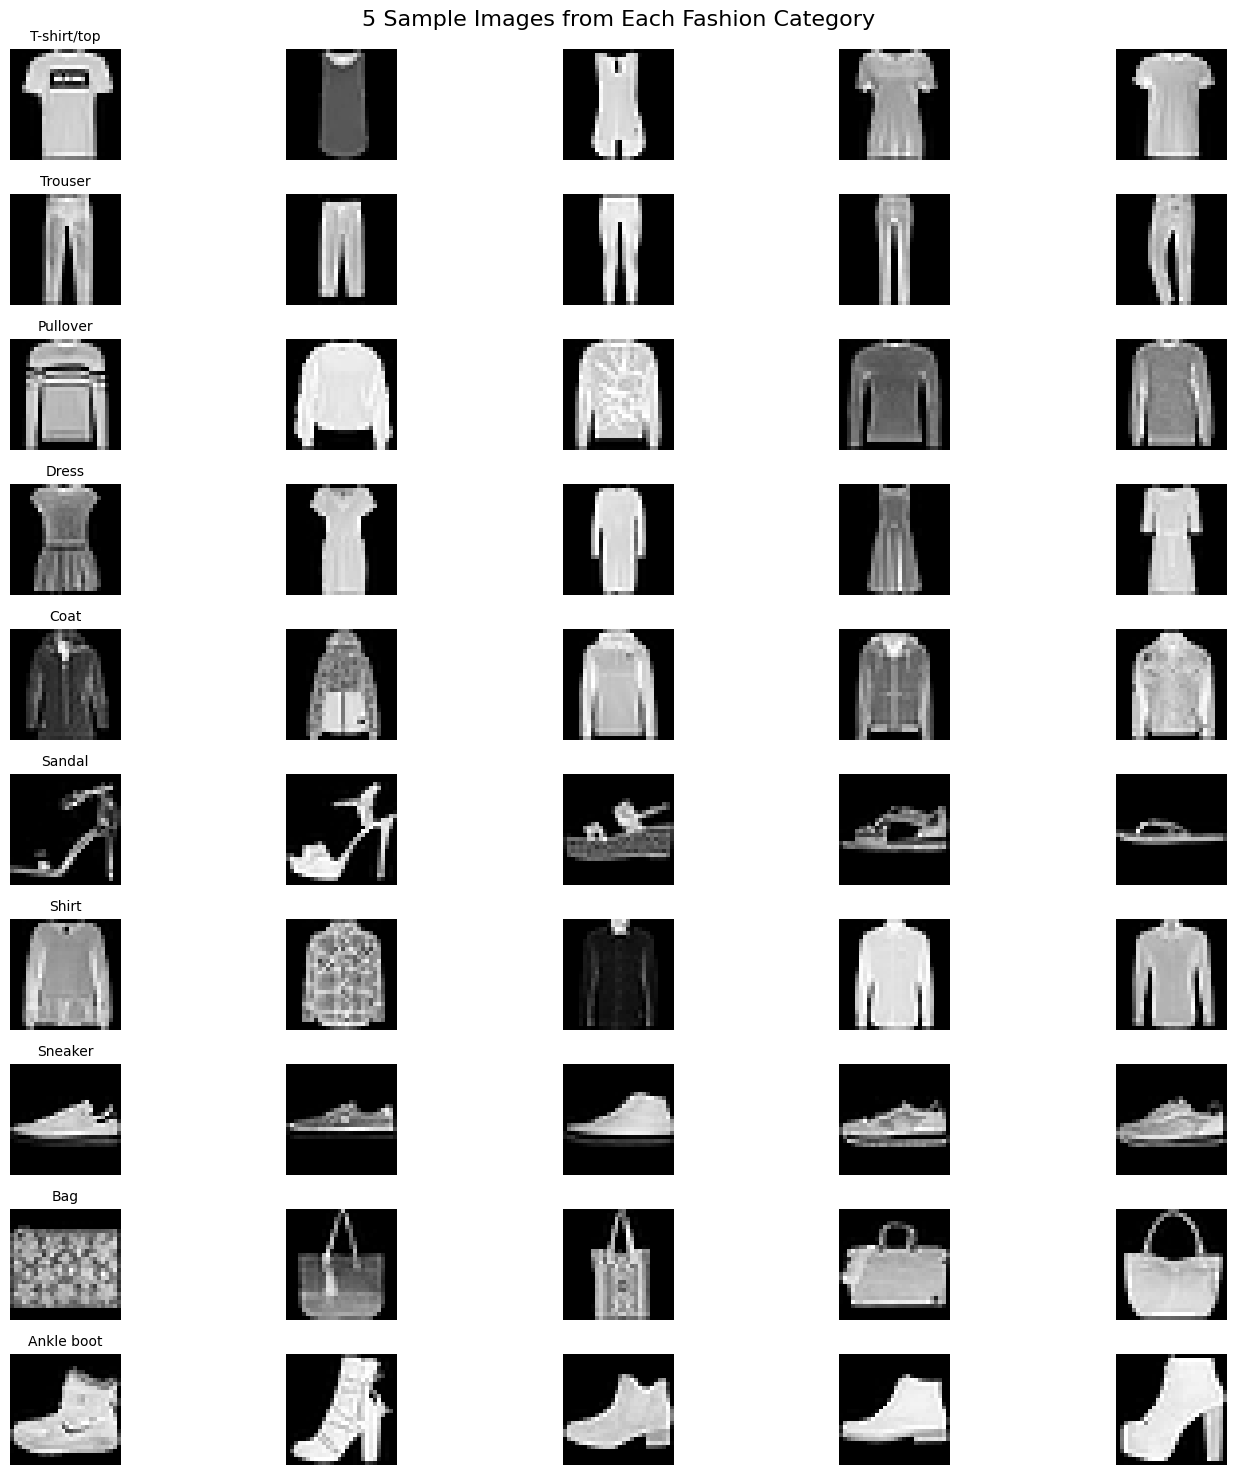

In [ ]:
# Plot 5 images per category
plt.figure(figsize=(15, 15))
samples_per_class = 5

for label in unique_classes:
    idxs = np.where(y_train == label)[0][:samples_per_class]
    for i, idx in enumerate(idxs):
        plt_idx = label * samples_per_class + i + 1
        plt.subplot(10, samples_per_class, plt_idx)
        plt.imshow(x_train[idx], cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(class_labels[label], fontsize=10)
plt.suptitle("5 Sample Images from Each Fashion Category", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# 3. Flatten each 28x28 image into a 784-dimensional vector
x_test = x_test_org.reshape(10000, 784)# Each image is converted into 784 pixel flatten array

print("Flattened Test Data Shape:", x_test.shape)


Flattened Test Data Shape: (10000, 784)


In [ ]:
x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# 4. Compute cosine similarity matrix (10000 x 10000)
cos_similarity = cosine_similarity(x_test)

# Optional: Convert to DataFrame
cosine_df = pd.DataFrame(cos_similarity)


In [ ]:
# 5. Select reference image index
ref_idx = 100  # you can change this to any index 0-9999

# Get cosine similarity vector for this image
image_info = cosine_df.iloc[ref_idx].values

# Get top 10 similar images (excluding itself)
similar_images_idx = np.argsort(-image_info)[1:11]  # skip the image itself

print("Most similar image indices:", similar_images_idx)


Most similar image indices: [2172 4372 5702 7563 2793 3686 7501 1393 3364 4722]


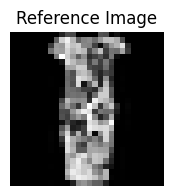

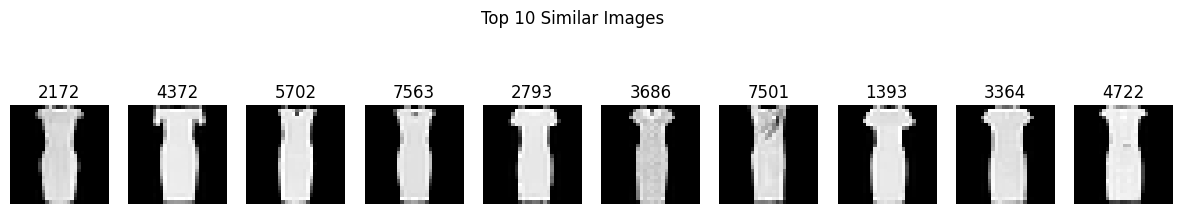

In [ ]:
# 6. Display the reference image
plt.figure(figsize=(2, 2))
plt.title("Reference Image")
plt.imshow(x_test_org[ref_idx], cmap='gray')
plt.axis('off')
plt.show()

# 7. Display top 10 similar images
plt.figure(figsize=(15, 3))
for i, idx in enumerate(similar_images_idx):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test_org[idx], cmap='gray')
    plt.title(f"{idx}")
    plt.axis('off')
plt.suptitle("Top 10 Similar Images")
plt.show()


# Summary


| Step               | Purpose                                      |
| ------------------ | -------------------------------------------- |
| Load Fashion MNIST | Get grayscale clothing images                |
| Flatten images     | Convert to 1D vectors                        |
| Cosine Similarity  | Find pattern-based image similarity          |
| Top-N Similar      | Show similar items (e.g., 10 nearest images) |


| **Aspect**                  | **Euclidean Distance**                              | **Manhattan Distance**                                | **Cosine Similarity/Distance**                                |     |     |
| --------------------------- | --------------------------------------------------- | ----------------------------------------------------- | ------------------------------------------------------------- | --- | --- |
| **Definition**              | Straight-line (L2 norm) distance between two points | Sum of absolute differences (L1 norm)                 | Measures angle (orientation) between two vectors              |     |     |
| **Value Range**             | \[0, ∞)                                             | \[0, ∞)                                               | $0, 2$ (as distance); $-1, 1$ as similarity                   |     |     |
| **Scale Sensitivity**       | Sensitive to magnitude and scale                    | Sensitive to scale                                    | **Not sensitive** to magnitude (only direction matters)       |     |     |
| **Best Use Case**           | Dense continuous numeric data (e.g., image pixels)  | Sparse or grid-like data (e.g., city block distances) | Text similarity, high-dimensional sparse data (e.g., TF-IDF)  |     |     |
| **Computational Cost**      | Moderate                                            | Low                                                   | Moderate (involves normalization and dot product)             |     |     |
| **Interprets Orientation?** | No                                                  | No                                                    | Yes (angle between vectors)                                   |     |     |
| **Interprets Magnitude?**   | Yes                                                 | Yes                                                   | No                                                            |     |     |
| **Sensitive to Outliers?**  | Yes                                                 | Yes (less than Euclidean)                             | No (as long as direction is preserved)                        |     |     |
| **When to Avoid**           | When features are not normalized or have outliers   | When actual direction matters                         | When vector magnitudes carry semantic meaning (e.g., ratings) |     |     |
| **Data Requirements**       | Numeric, normalized preferred                       | Numeric, can work with integers                       | Vectorized (dense or sparse), non-zero preferred              |     |     |


# Compulsary task

Do the same with Euclidean distance using from sklearn.metrics.pairwise import euclidean_distances.
